# Projet Data Visualisation - IMDB

**Comment déceler un film populaire ?**

Import des librairies et du dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

data = pd.read_csv("./data/IMDB-Movie-Data.csv");

## Analyse des données

Entêtes et types de donnée du dataset.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Ont vérifie si des valeurs sont null

In [3]:
print(data.isna().any(), "\n\n", data.isna().sum())
# suppression des valeurs null
data = data.dropna()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool 

 Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


Ont remarque 5 Series dont les données sont de type object. Verifions d'abord les Series "Title" et "Description" puis "Genre", "Actors" et "Director".

In [4]:
# DataFrame des titre de films avec leur description sans doublon
data.loc[:, ["Title", "Description"]].groupby(["Title", "Description"]).sum()

Empty DataFrame
Columns: []
Index: [((500) Days of Summer, An offbeat romantic comedy about a woman who doesn't believe true love exists, and the young man who falls for her.), (10 Cloverfield Lane, After getting in a car accident, a woman is held in a shelter with two men, who claim the outside world is affected by a widespread chemical attack.), (12 Years a Slave, In the antebellum United States, Solomon Northup, a free black man from upstate New York, is abducted and sold into slavery.), (127 Hours, An adventurous mountain climber becomes trapped under a boulder while canyoneering alone near Moab, Utah and resorts to desperate measures in order to survive.), (13 Hours, During an attack on a U.S. compound in Libya, a security team struggles to make sense out of the chaos.), (1408, A man who specializes in debunking paranormal occurrences checks into the fabled room 1408 in the Dolphin Hotel. Soon after settling in, he confronts genuine terror.), (17 Again, Mike O'Donnell is ungrateful for how his life turned out. He gets a chance to rewrite his life when he tried to save a janitor near a bridge and jumped after him into a time vortex.), (2012, A frustrated writer struggles to keep his family alive when a series of global catastrophes threatens to annihilate mankind.), (20th Century Women, The story of a teenage boy, his mother, and two other women who help raise him among the love and freedom of Southern California of 1979.), (21, "21" is the fact-based story about six MIT students who were trained to become experts in card counting and subsequently took Vegas casinos for millions in winnings.), (21 Jump Street, A pair of underachieving cops are sent back to a local high school to blend in and bring down a synthetic drug ring.), (22 Jump Street, After making their way through high school (twice), big changes are in store for officers Schmidt and Jenko when they go deep undercover at a local college.), (2307: Winter's Dream, In 2307, a future soldier is sent on a mission to hunt down the leader of the humanoid rebellion.), (28 Weeks Later, Six months after the rage virus was inflicted on the population of Great Britain, the US Army helps to secure a small area of London for the survivors to repopulate and start again. But not everything goes to plan.), (3 Days to Kill, A dying CIA agent trying to reconnect with his estranged daughter is offered an experimental drug that could save his life in exchange for one last assignment.), (3 Idiots, Two friends are searching for their long lost companion. They revisit their college days and recall the memories of their friend who inspired them to think differently, even as the rest of the world called them "idiots".), (300, King Leonidas of Sparta and a force of 300 men fight the Persians at Thermopylae in 480 B.C.), (300: Rise of an Empire, Greek general Themistokles leads the charge against invading Persian forces led by mortal-turned-god Xerxes and Artemisia, vengeful commander of the Persian navy.), (31, Five carnival workers are kidnapped and held hostage in an abandoned, Hell-like compound where they are forced to participate in a violent game, the goal of which is to survive twelve hours against a gang of sadistic clowns.), (42, This movie is about Jackie Robinson and his journey to becoming a Brooklyn Dodger and his life during that time.), (50/50, Inspired by a true story, a comedy centered on a 27-year-old guy who learns of his cancer diagnosis, and his subsequent struggle to beat the disease.), (A Bigger Splash, The vacation of a famous rock star and a filmmaker in Italy is disrupted by the unexpected visit of an old friend and his daughter.), (A Cure for Wellness, An ambitious young executive is sent to retrieve his company's CEO from an idyllic but mysterious "wellness center" at a remote location in the Swiss Alps, but soon suspects that the spa's treatments are not what they seem.), (A Good Year, A British investment broker inherits his uncle's chateau and vineyard in Pro

In [5]:
# DataFrame des titre de films sans doublon
data.loc[:, ["Title"]].groupby(["Title"]).sum()

Empty DataFrame
Columns: []
Index: [(500) Days of Summer, 10 Cloverfield Lane, 12 Years a Slave, 127 Hours, 13 Hours, 1408, 17 Again, 2012, 20th Century Women, 21, 21 Jump Street, 22 Jump Street, 2307: Winter's Dream, 28 Weeks Later, 3 Days to Kill, 3 Idiots, 300, 300: Rise of an Empire, 31, 42, 50/50, A Bigger Splash, A Cure for Wellness, A Good Year, A Hologram for the King, A Kind of Murder, A Million Ways to Die in the West, A Monster Calls, A Quiet Passion, A Street Cat Named Bob, A United Kingdom, A Walk Among the Tombstones, About Time, Across the Universe, Adoration, After Earth, Ah-ga-ssi, Alexander and the Terrible, Horrible, No Good, Very Bad Day, Alice Through the Looking Glass, Alice in Wonderland, Aliens vs Predator - Requiem, All Good Things, Allegiant, Allied, American Gangster, American Honey, American Hustle, American Reunion, American Sniper, Anna Karenina, Annabelle, Annie, Ant-Man, Anthropoid, Antichrist, Apocalypto, Argo, Arrival, Assassin's Creed, August Rush, Australia, Avatar, Avengers: Age of Ultron, Babel, Bacalaureat, Bad Moms, Barbershop: The Next Cut, Bastille Day, Batman v Superman: Dawn of Justice, Battleship, Beautiful Creatures, Before We Go, Begin Again, Ben-Hur, Beowulf, Big Hero 6, Billy Lynn's Long Halftime Walk, Birdman or (The Unexpected Virtue of Ignorance), Birth of the Dragon, Black Mass, Black Swan, Blackhat, Blair Witch, Bleed for This, Blended, Blood Diamond, Blood Father, Blue Jasmine, Blue Valentine, Body of Lies, Bone Tomahawk, Bonjour Anne, Boyhood, Brave, Bride Wars, Bridesmaids, Bridge of Spies, Bridge to Terabithia, Bridget Jones's Baby, Brooklyn, ...]

[837 rows x 0 columns]

In [6]:
# DataFrame des description de films sans doublon
data.loc[:, ["Description"]].groupby(["Description"]).sum()

Empty DataFrame
Columns: []
Index: ["21" is the fact-based story about six MIT students who were trained to become experts in card counting and subsequently took Vegas casinos for millions in winnings., "Mr. Church" tells the story of a unique friendship that develops when a little girl and her dying mother retain the services of a talented cook - Henry Joseph Church. What begins as a six month arrangement instead spans into fifteen years and creates a family bond that lasts forever., #1 NASCAR driver Ricky Bobby stays atop the heap thanks to a pact with his best friend and teammate, Cal Naughton, Jr. But when a French Formula One driver, makes his way up the ladder, Ricky Bobby's talent and devotion are put to the test., 12-year-old orphan Peter is spirited away to the magical world of Neverland, where he finds both fun and danger, and ultimately discovers his destiny -- to become the hero who will be forever known as Peter Pan., 19-year-old Billy Lynn is brought home for a victory tour after a harrowing Iraq battle. Through flashbacks the film shows what really happened to his squad - contrasting the realities of war with America's perceptions., 3 high school seniors throw a birthday party to make a name for themselves. As the night progresses, things spiral out of control as word of the party spreads., 70-year-old widower Ben Whittaker has discovered that retirement isn't all it's cracked up to be. Seizing an opportunity to get back in the game, he becomes a senior intern at an online fashion site, founded and run by Jules Ostin., A British investment broker inherits his uncle's chateau and vineyard in Provence, where he spent much of his childhood. He discovers a new laid-back lifestyle as he tries to renovate the estate to be sold., A CIA agent goes on the run after a defector accuses her of being a Russian spy., A CIA agent on the ground in Jordan hunts down a powerful terrorist leader while being caught between the unclear intentions of his American supervisors and Jordan Intelligence., A CIA operative hires a team of mercenaries to eliminate a Latin dictator and a renegade CIA agent., A Hollywood fixer in the 1950s works to keep the studio's stars in line., A Malinois dog that helped American Marines in Afghanistan returns to the United States and is adopted by his handler's family after suffering a traumatic experience., A Marine travels to Louisiana after serving three tours in Iraq and searches for the unknown woman he believes was his good luck charm during the war., A Mumbai teen reflects on his upbringing in the slums when he is accused of cheating on the Indian Version of "Who Wants to be a Millionaire?", A New Jersey guy dedicated to his family, friends, and church, develops unrealistic expectations from watching porn and works to find happiness and intimacy with his potential true love., A New York socialite, deeply troubled and in denial, arrives in San Francisco to impose upon her sister. She looks a million, but isn't bringing money, peace, or love..., A New York writer on sex and love is finally getting married to her Mr. Big. But her three best girlfriends must console her after one of them inadvertently leads Mr. Big to jilt her., A Portokalos family secret brings the beloved characters back together for an even bigger and Greeker wedding., A Russian teenager living in London who dies during childbirth leaves clues to a midwife in her journal that could tie her child to a rape involving a violent Russian mob family., A U.S. Customs official uncovers a money laundering scheme involving Colombian drug lord Pablo Escobar., A U.S. fighter pilot's epic struggle of survival after being shot down on a mission over Laos during the Vietnam War., A Ugandan girl sees her world rapidly change after being introduced to the game of chess., A boy growing up in Dublin during the 1980s escapes his strained family life by starting a band to impress the mysterious girl he likes., A boy seeks the help of a tree monster to c

On observe la présence de 999 titre de films et 1000 desctiptions. Cela veux dire que deux films possèdent le même titre sans avoir la même description.

In [7]:
data.loc[:, ["Genre", "Actors", "Director"]]

Genre  \
0     Action,Adventure,Sci-Fi   
1    Adventure,Mystery,Sci-Fi   
2             Horror,Thriller   
3     Animation,Comedy,Family   
4    Action,Adventure,Fantasy   
..                        ...   
993   Action,Adventure,Horror   
994                    Comedy   
996                    Horror   
997       Drama,Music,Romance   
999     Comedy,Family,Fantasy   

                                                Actors              Director  
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...            James Gunn  
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...          Ridley Scott  
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...    M. Night Shyamalan  
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  Christophe Lourdelet  
4    Will Smith, Jared Leto, Margot Robbie, Viola D...            David Ayer  
..                                                 ...                   ...  
993  Milla Jovovich, Ali Larter, Wentworth Miller,K...    Paul W.S. Anderson  
994  Thomas Mann, Oliver Cooper, Jonathan Daniel Br...       Nima Nourizadeh  
996  Lauren German, Heather Matarazzo, Bijou Philli...              Eli Roth  
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...            Jon M. Chu  
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...      Barry Sonnenfeld  

[838 rows x 3 columns]

In [8]:
# liste des genres - complexité O(n)
genres = []
for genre in data["Genre"]:
    genres = genres + genre.split(",")
genres = list(set(genres))

# compte le nombre de fois ou le genre apparait - complexité O(n)
def nb_genre(genre):
    tmp_genres = []
    tmp_count = 0
    for m_genre in data["Genre"]:
        tmp_genres = tmp_genres + m_genre.split(",")
    for m_genre in tmp_genres:
        if (m_genre == genre):
            tmp_count = tmp_count + 1
    return tmp_count

# DataFrame des genres avec le nombre de films associées
df_genres = pd.DataFrame(genres, columns=["Genre"])
df_genres["nb movies"] = df_genres["Genre"].apply(lambda genre: nb_genre(genre))
df_genres

Genre  nb movies
0       Music         15
1      Sci-Fi        107
2     Mystery         86
3      Family         48
4       Drama        419
5     Romance        120
6         War         10
7      Comedy        250
8       Crime        126
9   Animation         45
10    History         25
11    Western          4
12     Horror         87
13  Adventure        244
14  Biography         67
15   Thriller        148
16     Action        277
17    Fantasy         92
18      Sport         15
19    Musical          5

In [9]:
df_genres.describe()

nb movies
count   20.000000
mean   109.500000
std    110.409048
min      4.000000
25%     22.500000
50%     86.500000
75%    131.500000
max    419.000000

In [10]:
# liste des acteurs - complexité O(n)
actors = []
for actor in data["Actors"]:
    actors = actors + actor.split(", ")
actors = list(set(actors))
actors2 = []
for actor in actors:
    actors2 = actors2 + actor.split(",")
actors = list(set(actors2))

# ajout d'une Serie contant le nombre d'acteurs
def actorsNumber(actors):
    actorslist = []
    actorslist = actors.split(", ")
    actorslist2 = []
    for actor in actorslist:
        actorslist2 = actorslist2 + actor.split(",")
    return len(actorslist2)

data["nb Actors"] = data["Actors"].apply(lambda actors: actorsNumber(actors))

In [11]:
# compte le nombre de fois ou l'acteur apparait - complexité O(n)
def nb_actor(actor):
    tmp_actors = []
    tmp_actors2 = []
    tmp_count = 0
    for m_actor in data["Actors"]:
        tmp_actors = tmp_actors + m_actor.split(", ")
    for m_actor in tmp_actors:
        tmp_actors2 = tmp_actors2 + m_actor.split(",")
    for m_actor in tmp_actors2:
        if (m_actor == actor):
            tmp_count = tmp_count + 1
    return tmp_count

# DataFrame des acteurs avec le nombre de films associées
df_actors = pd.DataFrame(actors, columns=["Actors"])
# df_actors["nb movies"] = df_actors["Actors"].apply(lambda actor: nb_actor(actor)) # Trop lourd - 7 938 015 verifications
df_actors

Actors
0       Saurabh Shukla
1     Rebecca Ferguson
2     Salim Kechiouche
3          Emily Meade
4        Art Parkinson
...                ...
1633        Mel Gibson
1634      Jay Baruchel
1635         Dax Flame
1636    Jason Sudeikis
1637    Alexis Clagett

[1638 rows x 1 columns]

In [12]:
# liste des réalisateurs - complexité O(n)
directors = []
for director in data["Director"]:
    directors.append(director)
directors = list(set(directors))

def nb_director(director):
    tmp_count = 0
    for m_director in data["Director"]:
        if (m_director == director):
            tmp_count = tmp_count + 1
    return tmp_count

# DataFrame des réalisateurs
df_directors = pd.DataFrame(directors, columns=["Director"])
df_directors["nb movies"] = df_directors["Director"].apply(lambda director: nb_director(director))
df_directors

Director  nb movies
0        Anne Fletcher          2
1        Joel Edgerton          1
2    Steven Soderbergh          3
3         Biyi Bandele          1
4       Neill Blomkamp          2
..                 ...        ...
519        Danny Boyle          5
520        Tim Johnson          1
521        Jake Kasdan          1
522     Chad Stahelski          1
523         Shawn Levy          3

[524 rows x 2 columns]

Regardons un peu les valeurs des données numériques

In [13]:
data.describe()

Rank        Year  Runtime (Minutes)      Rating         Votes  \
count   838.000000   838.00000         838.000000  838.000000  8.380000e+02   
mean    485.247017  2012.50716         114.638425    6.814320  1.932303e+05   
std     286.572065     3.17236          18.470922    0.877754  1.930990e+05   
min       1.000000  2006.00000          66.000000    1.900000  1.780000e+02   
25%     238.250000  2010.00000         101.000000    6.300000  6.127650e+04   
50%     475.500000  2013.00000         112.000000    6.900000  1.368795e+05   
75%     729.750000  2015.00000         124.000000    7.500000  2.710830e+05   
max    1000.000000  2016.00000         187.000000    9.000000  1.791916e+06   

       Revenue (Millions)   Metascore   nb Actors  
count          838.000000  838.000000  838.000000  
mean            84.564558   59.575179    3.998807  
std            104.520227   16.952416    0.034544  
min              0.000000   11.000000    3.000000  
25%             13.967500   47.000000    4.000000  
50%             48.150000   60.000000    4.000000  
75%            116.800000   72.000000    4.000000  
max            936.630000  100.000000    4.000000

On compte 4 acteurs pour chaque film avec une variance très faible dans ce dataset, la donnée "nb Actors" est donc inexploitable.

## Visualisation

In [14]:
data_sample = data.sample(100)

<AxesSubplot:xlabel='Genre', ylabel='nb movies'>

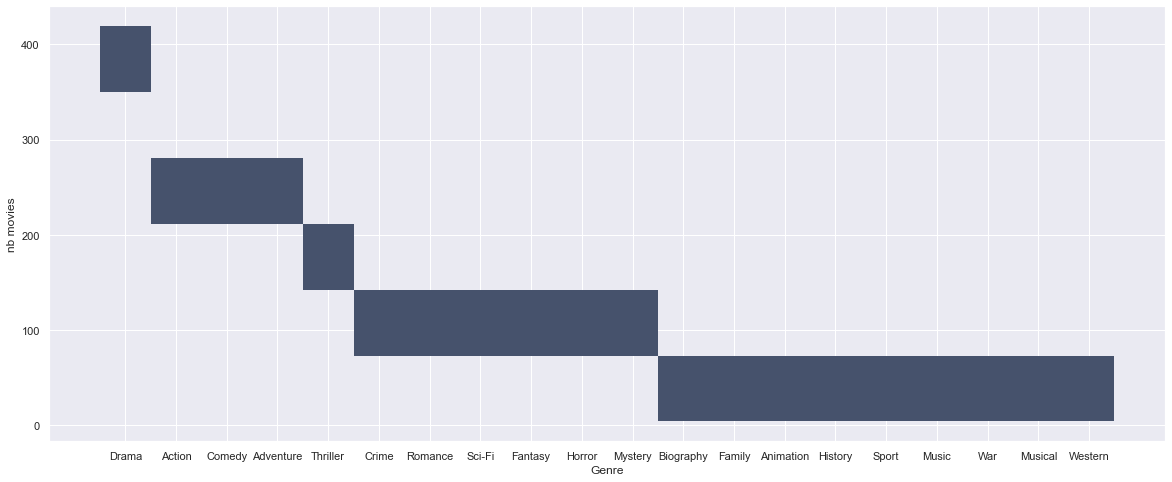

In [15]:
df_genres = df_genres.sort_values(by=["nb movies"], ascending=False)

fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(data=df_genres, x="Genre", y="nb movies", ax=ax)

In [16]:
df_genres.head(5)

Genre  nb movies
4       Drama        419
16     Action        277
7      Comedy        250
13  Adventure        244
15   Thriller        148

Ont observe ici les genres les plus utilisées pour décrire les films issues de nos données.

In [17]:
df_directors = df_directors.sort_values(by=["nb movies"], ascending=False)
df_directors.head(10)

Director  nb movies
30         Ridley Scott          8
363  Paul W.S. Anderson          6
344         David Yates          6
119         Michael Bay          6
91     Denis Villeneuve          5
290          Justin Lin          5
21        David Fincher          5
199   Christopher Nolan          5
315         J.J. Abrams          5
188         Zack Snyder          5

<AxesSubplot:xlabel='Director', ylabel='nb movies'>

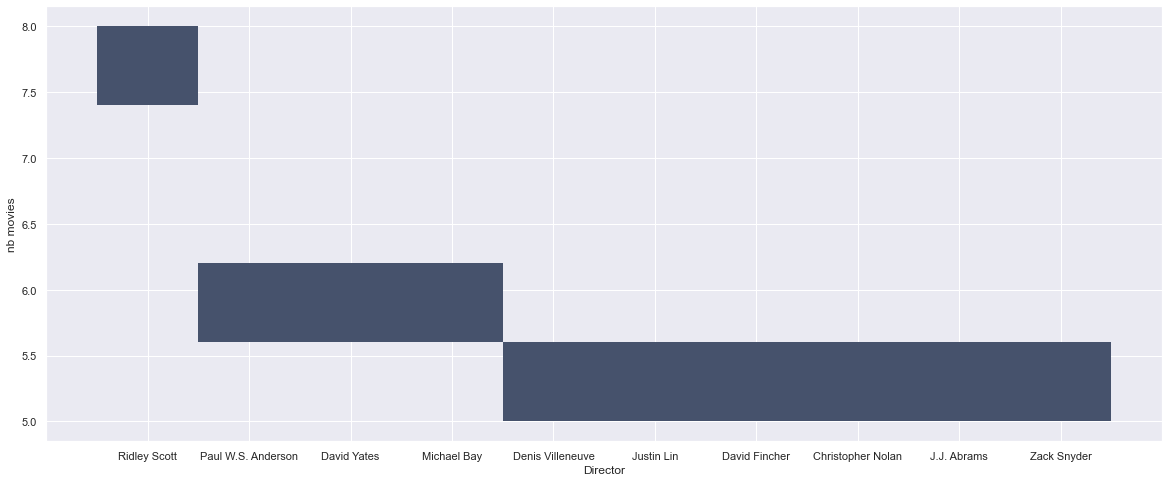

In [18]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(data=df_directors.head(10), x="Director", y="nb movies", ax=ax)

Ont observe ici les réalisateur ayant réalisés le plus de films

In [19]:
top_directors = data.loc[:, ["Director", "Rank", "Metascore"]].groupby(["Director"]).mean().sort_values(by=["Rank"], ascending=False)
top_directors.head(20)

Rank  Metascore
Director                             
Nima Nourizadeh      995.0       48.0
Aamir Khan           992.0       42.0
Patrick Tatopoulos   991.0       44.0
Shana Feste          988.0       30.0
Steven Quale         987.0       50.0
Boaz Yakin           985.0       47.0
Luke Greenfield      984.0       30.0
Julie Taymor         983.0       56.0
Patricia Riggen      981.0       44.0
Pedro Almodóvar      980.0       70.0
Mira Nair            975.0       73.0
Wes Craven           974.0       52.0
John Luessenhop      971.0       62.0
Steven R. Monroe     964.0       27.0
Justin Chadwick      963.0       50.0
Patricia Rozema      962.0       59.0
Scott Stewart        957.0       32.0
Tom Gormican         956.0       36.0
Jordan Vogt-Roberts  954.0       61.0
Alexander Payne      952.0       84.0

<AxesSubplot:xlabel='Rank', ylabel='Director'>

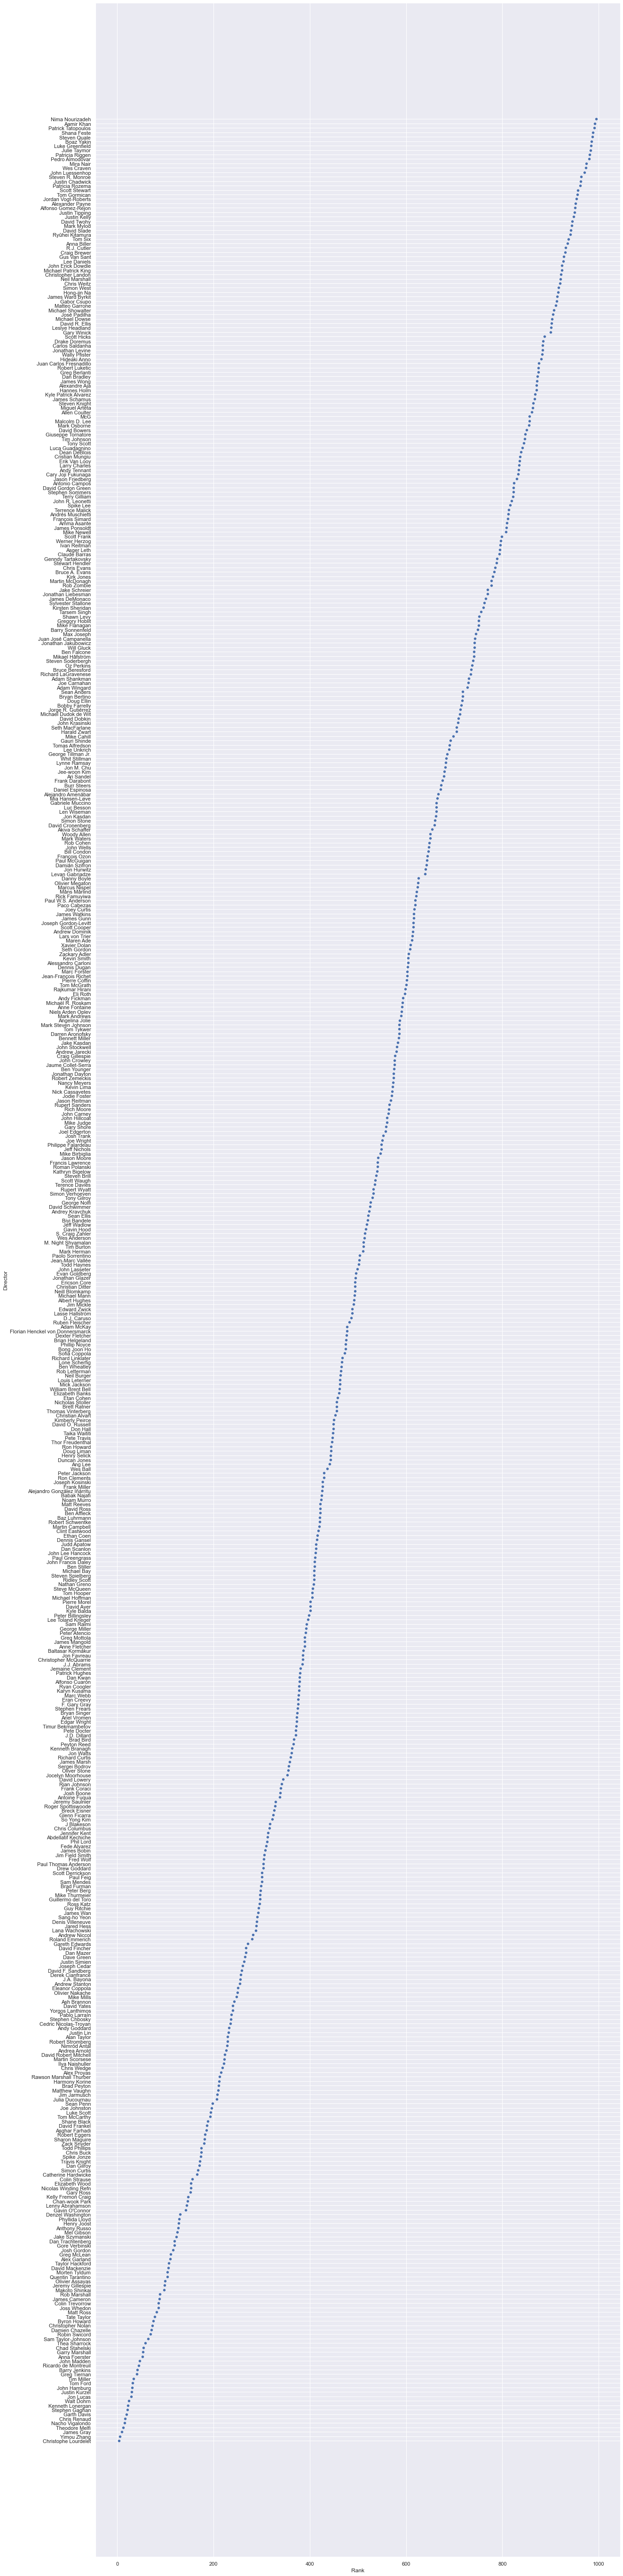

In [20]:
fig, ax = plt.subplots(figsize=(20, 100))
sns.scatterplot(data=top_directors, x="Rank", y="Director", ax=ax)

<AxesSubplot:>

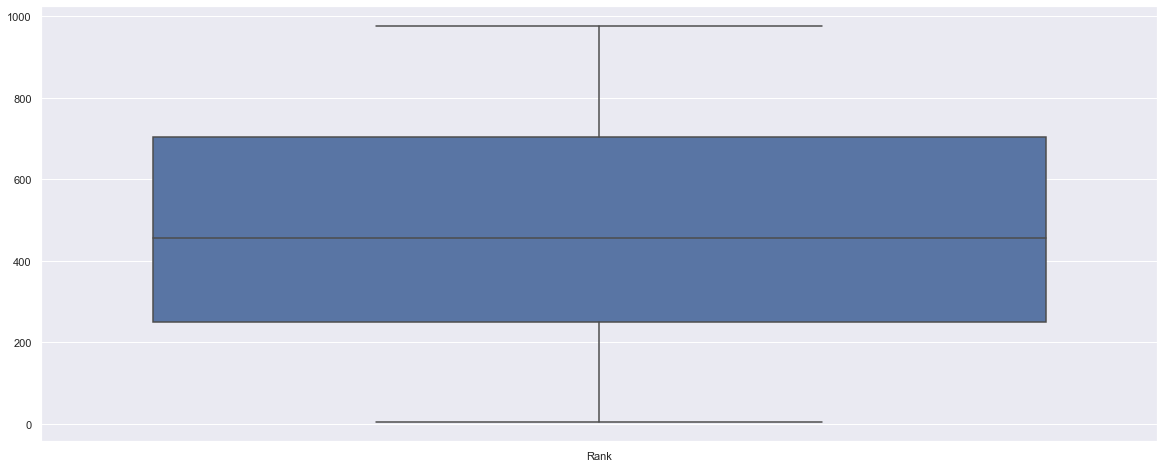

In [21]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=data_sample.loc[:, ["Rank"]], ax=ax)

<AxesSubplot:>

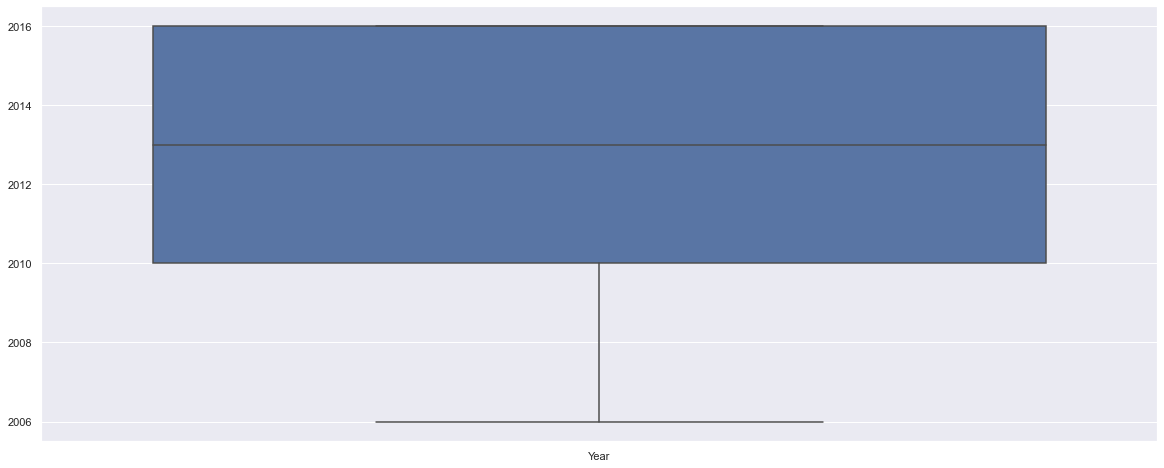

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=data_sample.loc[:, ["Year"]], ax=ax)

<AxesSubplot:>

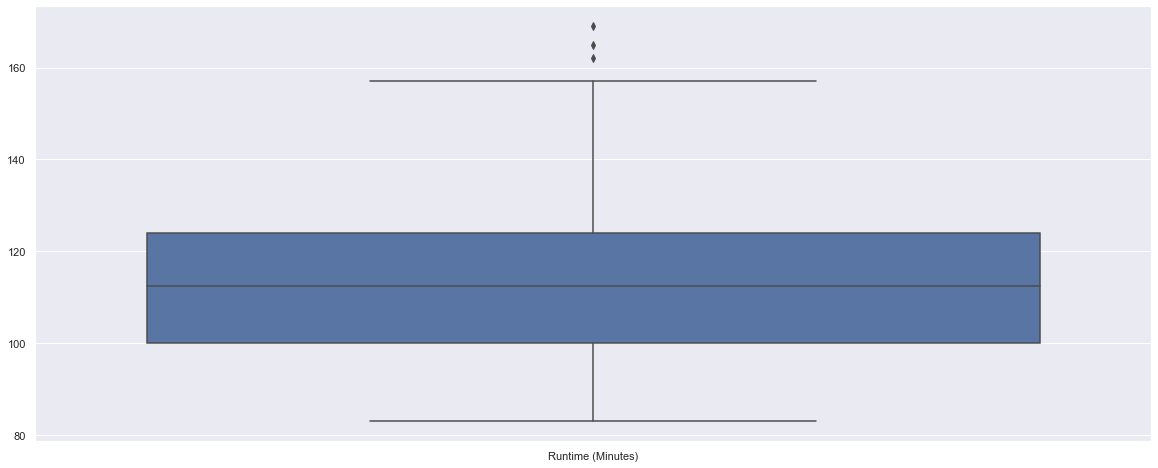

In [23]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=data_sample.loc[:, ["Runtime (Minutes)"]], ax=ax)

<AxesSubplot:>

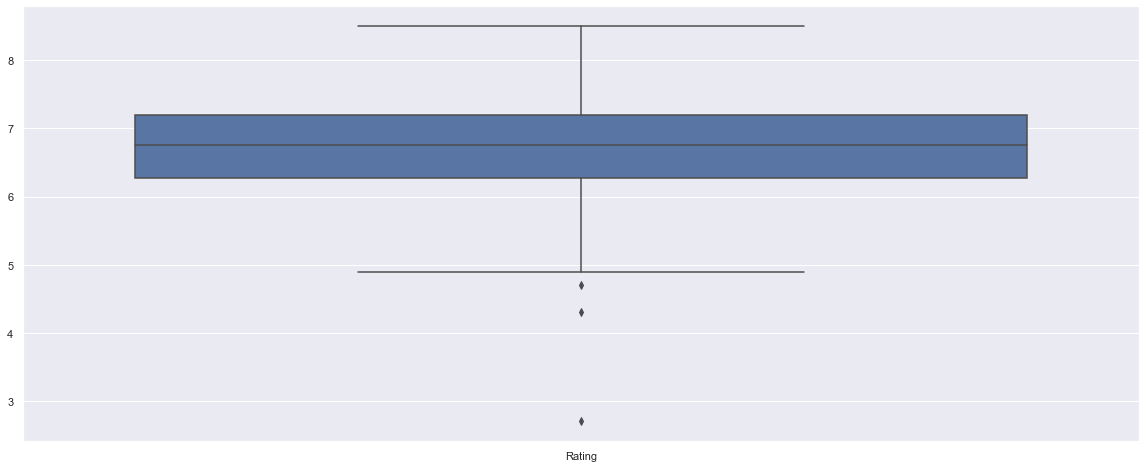

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=data_sample.loc[:, ["Rating"]], ax=ax)

<AxesSubplot:>

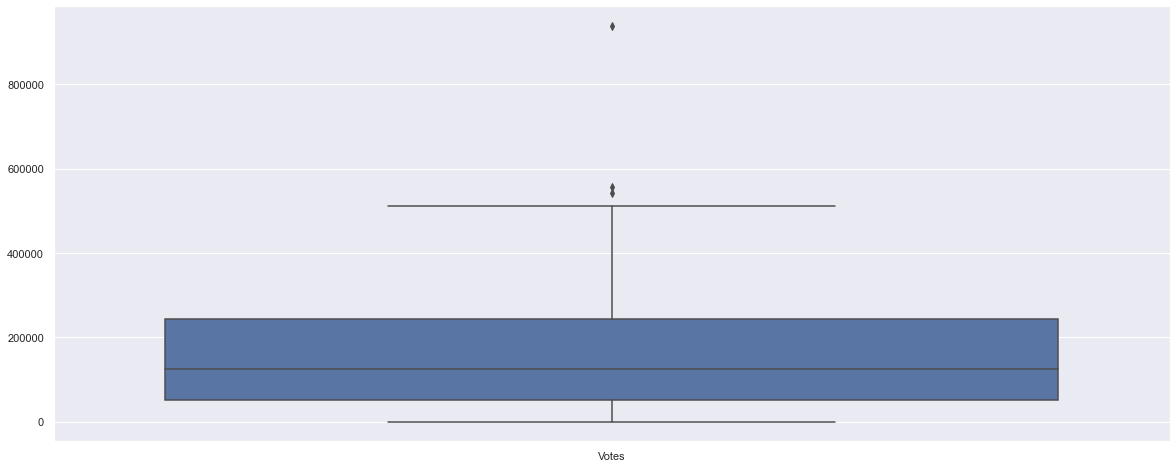

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=data_sample.loc[:, ["Votes"]], ax=ax)

<AxesSubplot:>

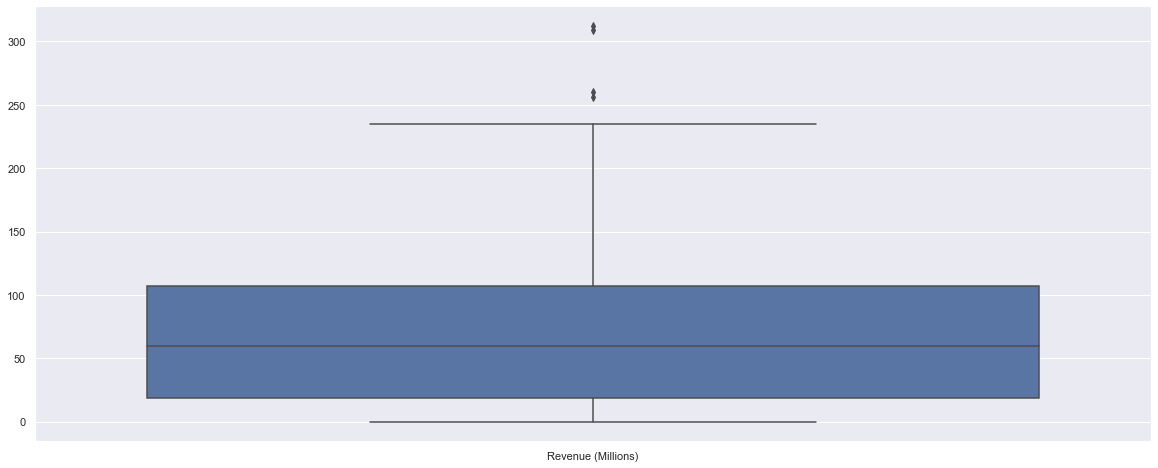

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=data_sample.loc[:, ["Revenue (Millions)"]], ax=ax)

<AxesSubplot:>

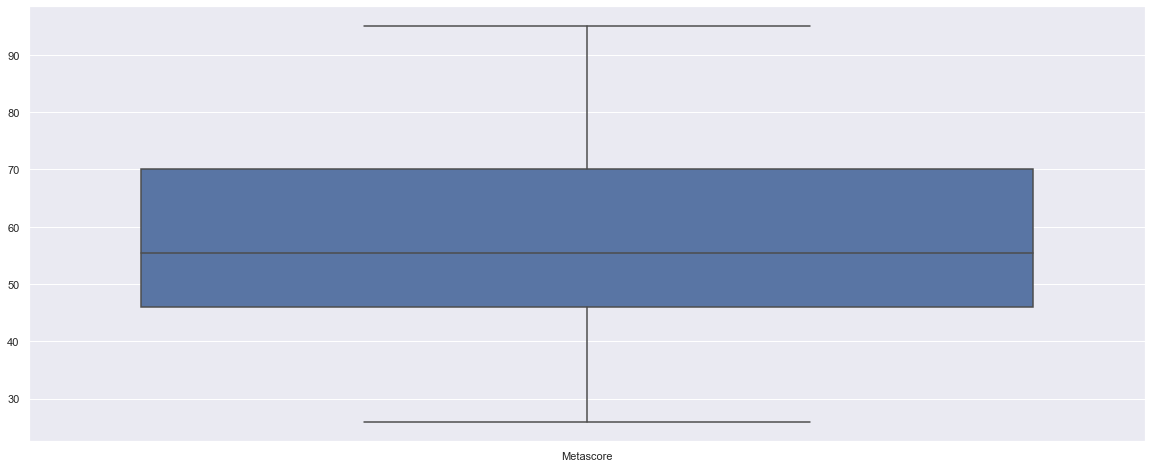

In [27]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=data_sample.loc[:, ["Metascore"]], ax=ax)

On observe des valeurs aberantes sur le sample de nos data pour les valeurs :
- Runtime
- Rating
- Votes
- Revenue

Le but est donc de les exclurent de notre sample pour voir un bon film parmi les films qui ne sortent pas du lot.

In [28]:
data_sample2 = data_sample[(data_sample["Runtime (Minutes)"] < 160) &
                           (data_sample["Rating"] > 4.5) &
                           (data_sample["Votes"] < 500000) &
                           (data_sample["Revenue (Millions)"] < 300)]
data_sample

Rank                                    Title                    Genre  \
629   630  Night at the Museum: Secret of the Tomb  Adventure,Comedy,Family   
247   248                       20th Century Women             Comedy,Drama   
181   182       The VVitch: A New-England Folktale           Horror,Mystery   
280   281                           Now You See Me   Crime,Mystery,Thriller   
496   497                           Men in Black 3  Action,Adventure,Comedy   
..    ...                                      ...                      ...   
48     49                         Star Trek Beyond  Action,Adventure,Sci-Fi   
834   835                             The Dictator                   Comedy   
621   622                     Underworld Awakening    Action,Fantasy,Horror   
14     15                                 Colossal      Action,Comedy,Drama   
714   715                       The Heartbreak Kid           Comedy,Romance   

                                           Description          Director  \
629  Larry spans the globe, uniting favorite and ne...        Shawn Levy   
247  The story of a teenage boy, his mother, and tw...        Mike Mills   
181  A family in 1630s New England is torn apart by...     Robert Eggers   
280  An FBI agent and an Interpol detective track a...   Louis Leterrier   
496  Agent J travels in time to M.I.B.'s early days...  Barry Sonnenfeld   
..                                                 ...               ...   
48   The USS Enterprise crew explores the furthest ...        Justin Lin   
834  The heroic story of a dictator who risked his ...     Larry Charles   
621  When human forces discover the existence of th...      Måns Mårlind   
14   Gloria is an out-of-work party girl forced to ...   Nacho Vigalondo   
714  A newly wed man who believes he's just gotten ...    Bobby Farrelly   

                                                Actors  Year  \
629  Ben Stiller, Robin Williams, Owen Wilson, Dick...  2014   
247  Annette Bening, Elle Fanning, Greta Gerwig, Bi...  2016   
181  Anya Taylor-Joy, Ralph Ineson, Kate Dickie, Ju...  2015   
280  Jesse Eisenberg, Common, Mark Ruffalo, Woody H...  2013   
496  Will Smith, Tommy Lee Jones, Josh Brolin,Jemai...  2012   
..                                                 ...   ...   
48   Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa...  2016   
834  Sacha Baron Cohen, Anna Faris, John C. Reilly,...  2012   
621  Kate Beckinsale, Michael Ealy, India Eisley, S...  2012   
14   Anne Hathaway, Jason Sudeikis, Austin Stowell,...  2016   
714  Ben Stiller, Michelle Monaghan,Malin Akerman, ...  2007   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  \
629                 98     6.2   74886              113.73       47.0   
247                119     7.4   14708                5.66       83.0   
181                 92     6.8  101781               25.14       83.0   
280                115     7.3  492324              117.70       50.0   
496                106     6.8  278379              179.02       58.0   
..                 ...     ...     ...                 ...        ...   
48                 122     7.1  164567              158.80       68.0   
834                 83     6.4  225394               59.62       58.0   
621                 88     6.4  127157               62.32       39.0   
14                 109     6.4    8612                2.87       70.0   
714                116     5.8   74664               36.77       46.0   

     nb Actors  
629          4  
247          4  
181          4  
280          4  
496          4  
..         ...  
48           4  
834          4  
621          4  
14           4  
714          4  

[100 rows x 13 columns]

<AxesSubplot:>

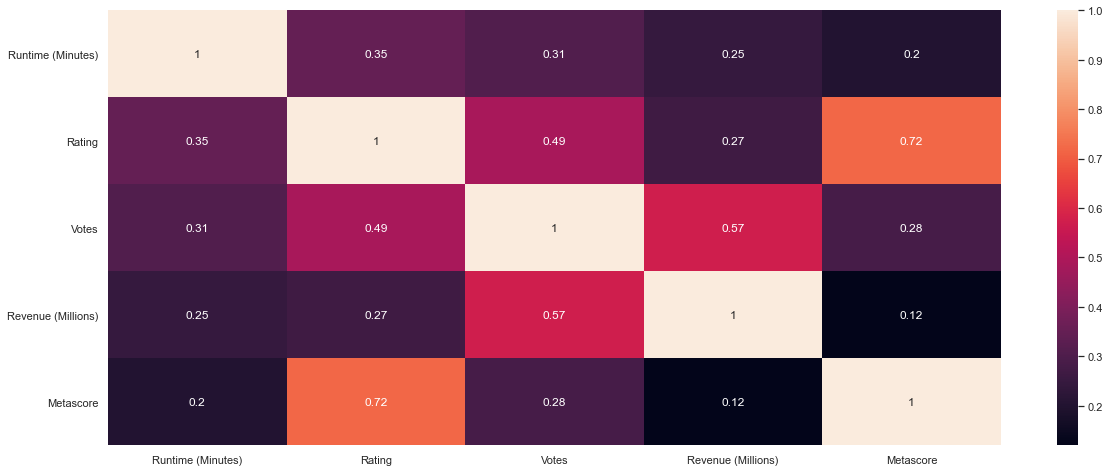

In [29]:
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(data_sample2.loc[:, ["Runtime (Minutes)", "Rating", "Votes", "Revenue (Millions)", "Metascore"]].corr(), annot=True, ax=ax)

Coefficient de correlation d'un film hors extrème

Mêmes opérations avec les 20 films les mieux notées

In [30]:
top_rates = data.sort_values(by=["Rating", "Metascore"], ascending=False)
top_rates.loc[:, ["Title", "Genre", "Director", "Runtime (Minutes)", "Rating", "Metascore"]].head(20)

Title                       Genre  \
54         The Dark Knight          Action,Crime,Drama   
80               Inception     Action,Adventure,Sci-Fi   
96           Kimi no na wa     Animation,Drama,Fantasy   
36            Interstellar      Adventure,Drama,Sci-Fi   
249       The Intouchables      Biography,Comedy,Drama   
476    The Lives of Others              Drama,Thriller   
133               Whiplash                 Drama,Music   
99            The Departed        Crime,Drama,Thriller   
124  The Dark Knight Rises             Action,Thriller   
64            The Prestige        Drama,Mystery,Sci-Fi   
991       Taare Zameen Par          Drama,Family,Music   
144       Django Unchained               Drama,Western   
430               3 Idiots                Comedy,Drama   
6               La La Land          Comedy,Drama,Music   
688            Toy Story 3  Animation,Adventure,Comedy   
499                     Up  Animation,Adventure,Comedy   
455                 Jagten                       Drama   
77    Inglourious Basterds         Adventure,Drama,War   
230        Pan's Labyrinth           Drama,Fantasy,War   
241             Inside Out  Animation,Adventure,Comedy   

                             Director  Runtime (Minutes)  Rating  Metascore  
54                  Christopher Nolan                152     9.0       82.0  
80                  Christopher Nolan                148     8.8       74.0  
96                     Makoto Shinkai                106     8.6       79.0  
36                  Christopher Nolan                169     8.6       74.0  
249                   Olivier Nakache                112     8.6       57.0  
476  Florian Henckel von Donnersmarck                137     8.5       89.0  
133                   Damien Chazelle                107     8.5       88.0  
99                    Martin Scorsese                151     8.5       85.0  
124                 Christopher Nolan                164     8.5       78.0  
64                  Christopher Nolan                130     8.5       66.0  
991                        Aamir Khan                165     8.5       42.0  
144                 Quentin Tarantino                165     8.4       81.0  
430                   Rajkumar Hirani                170     8.4       67.0  
6                     Damien Chazelle                128     8.3       93.0  
688                       Lee Unkrich                103     8.3       92.0  
499                       Pete Docter                 96     8.3       88.0  
455                 Thomas Vinterberg                115     8.3       76.0  
77                  Quentin Tarantino                153     8.3       69.0  
230                Guillermo del Toro                118     8.2       98.0  
241                       Pete Docter                 95     8.2       94.0

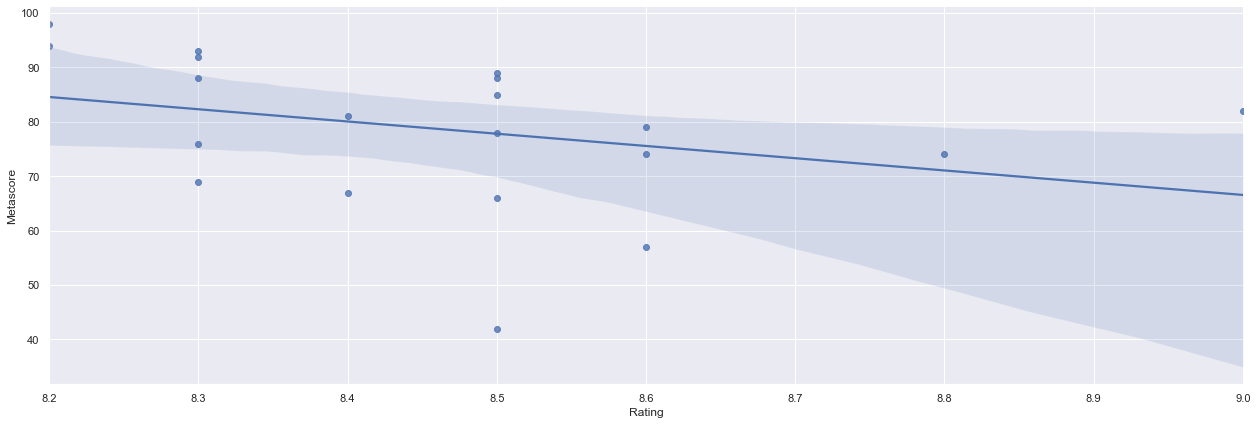

In [31]:
sns.lmplot(data=top_rates.head(20), x="Rating", y="Metascore").fig.set_size_inches(20,6)

<AxesSubplot:>

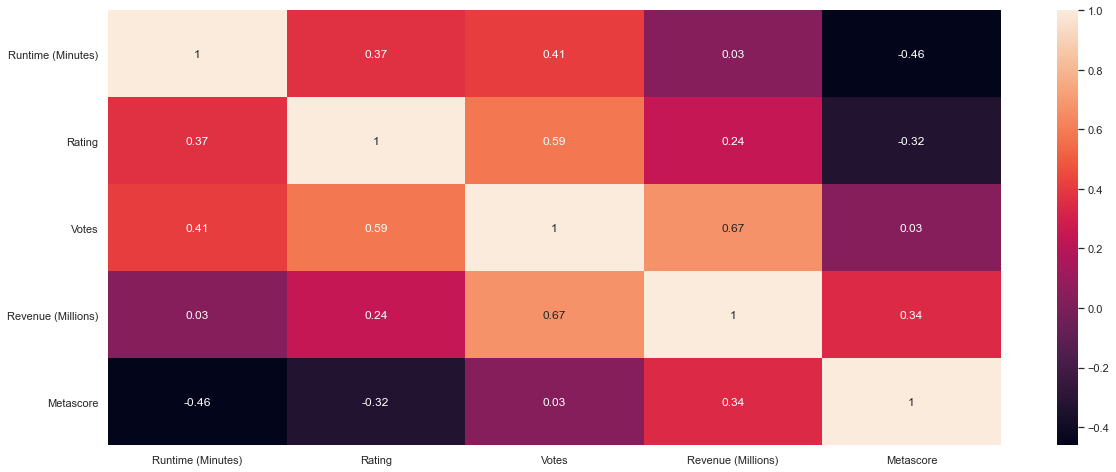

In [32]:
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(top_rates.loc[:, ["Runtime (Minutes)", "Rating", "Votes", "Revenue (Millions)", "Metascore"]].head(20).corr(), annot=True, ax=ax)

Correlation de 20 films à succès

L'évaluation d'un film va avec le métascore attribué

<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Metascore'>

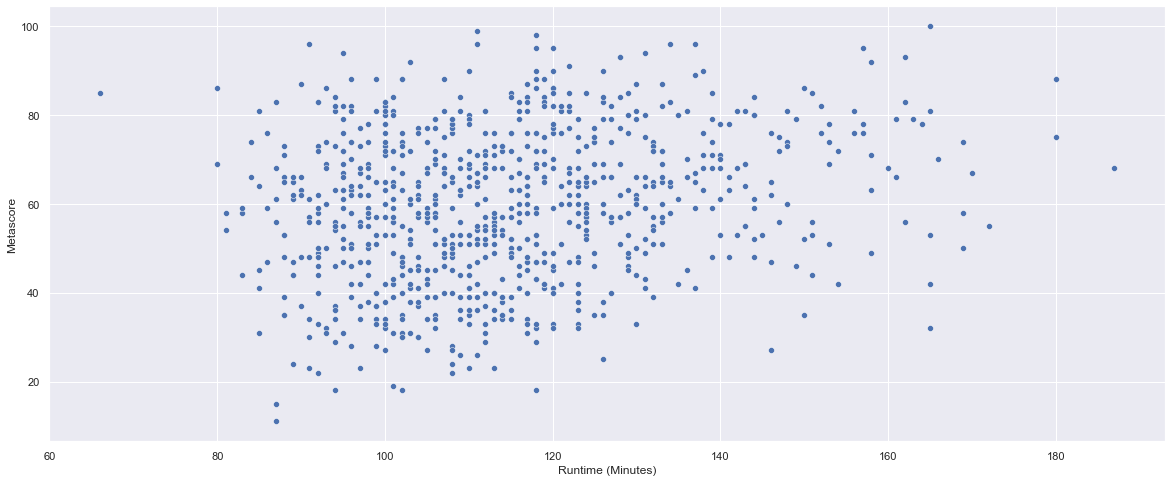

In [33]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.scatterplot(data=top_rates, x="Runtime (Minutes)", y="Metascore", ax=ax)

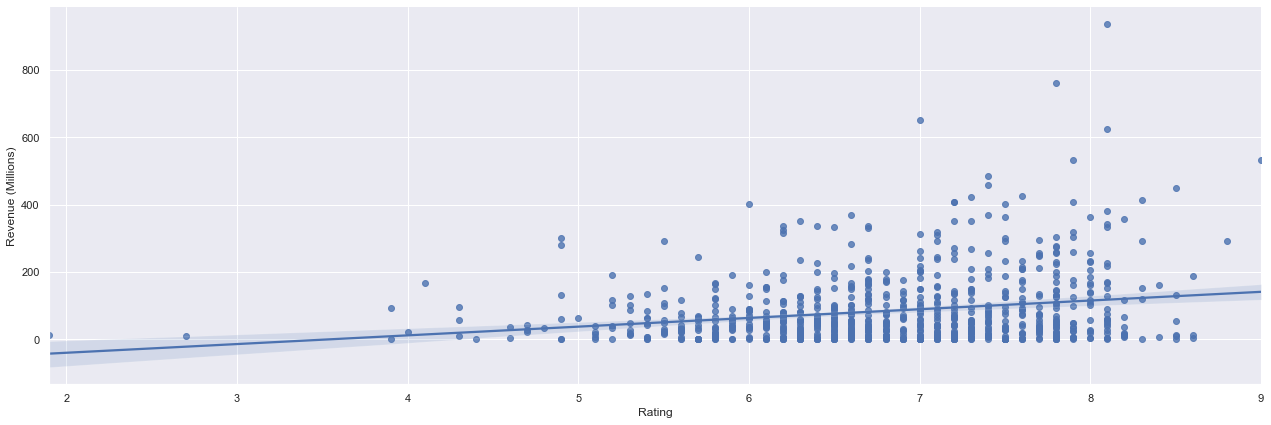

In [34]:
sns.lmplot(data=top_rates, x="Rating", y="Revenue (Millions)").fig.set_size_inches(20,6)

Mieux un film est noté plus il engendre de revenus

c:\users\quentin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

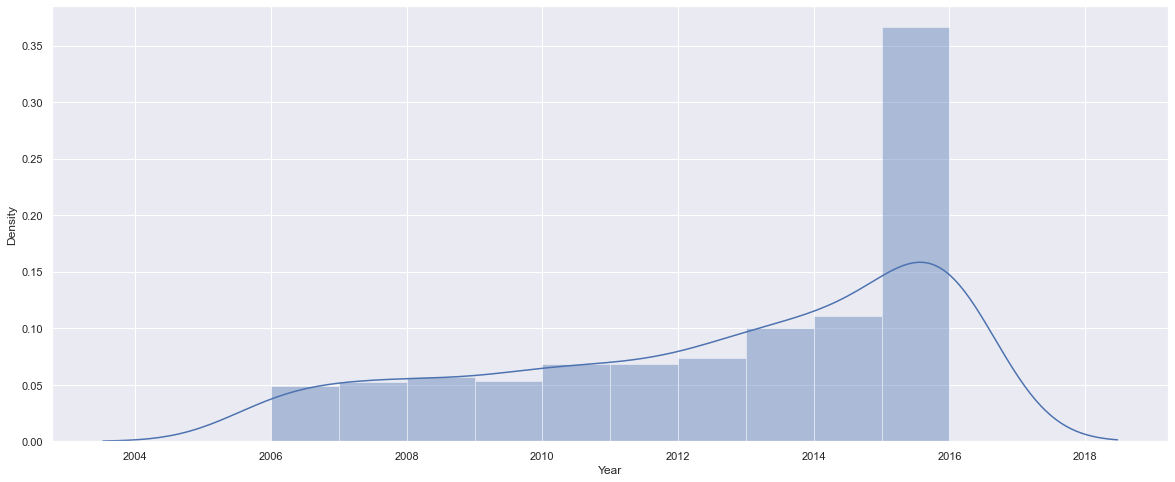

In [35]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.distplot(data["Year"], ax=ax)

On constate une sortie de film plus importante en 2016

<AxesSubplot:xlabel='Year', ylabel='Revenue (Millions)'>

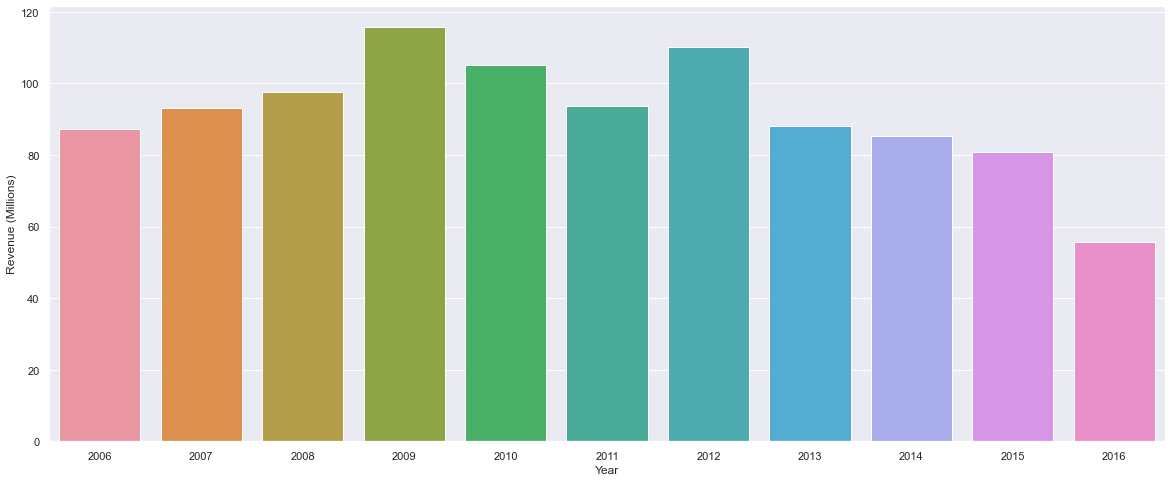

In [36]:
revenue_year = data.groupby(["Year"])[["Year", "Revenue (Millions)"]].mean()

fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(data=revenue_year, x="Year", y="Revenue (Millions)", ax=ax)

Malgrès cela, les recettes moyennes sont plus faibles en 2016

<AxesSubplot:xlabel='Rating', ylabel='Count'>

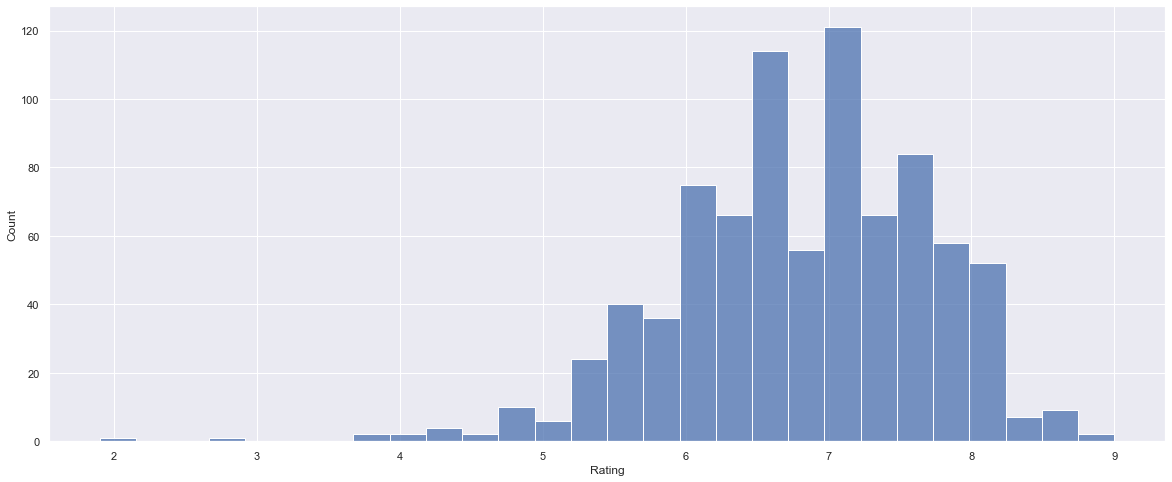

In [37]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(data["Rating"], ax=ax)

<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Count'>

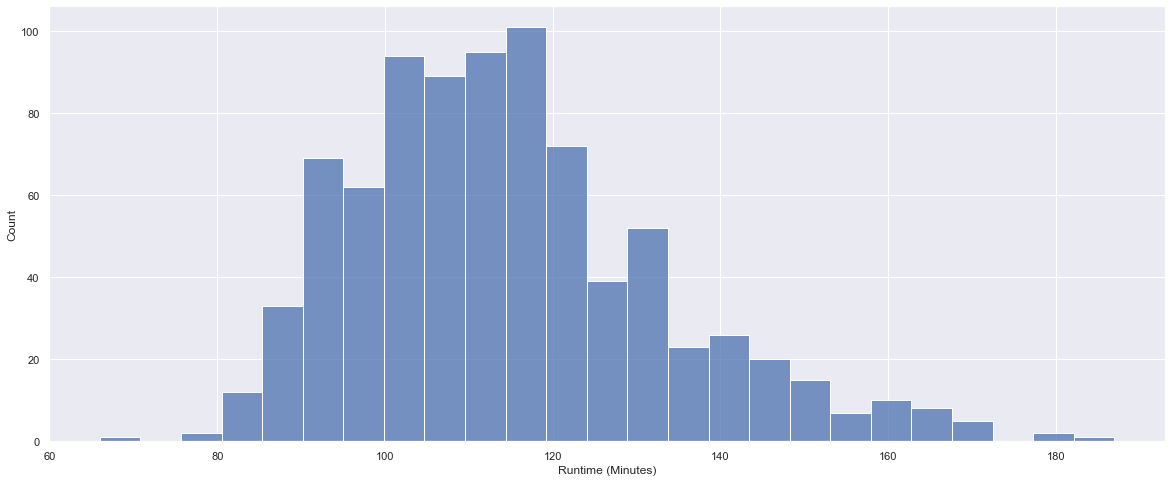

In [38]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(data["Runtime (Minutes)"], ax=ax)

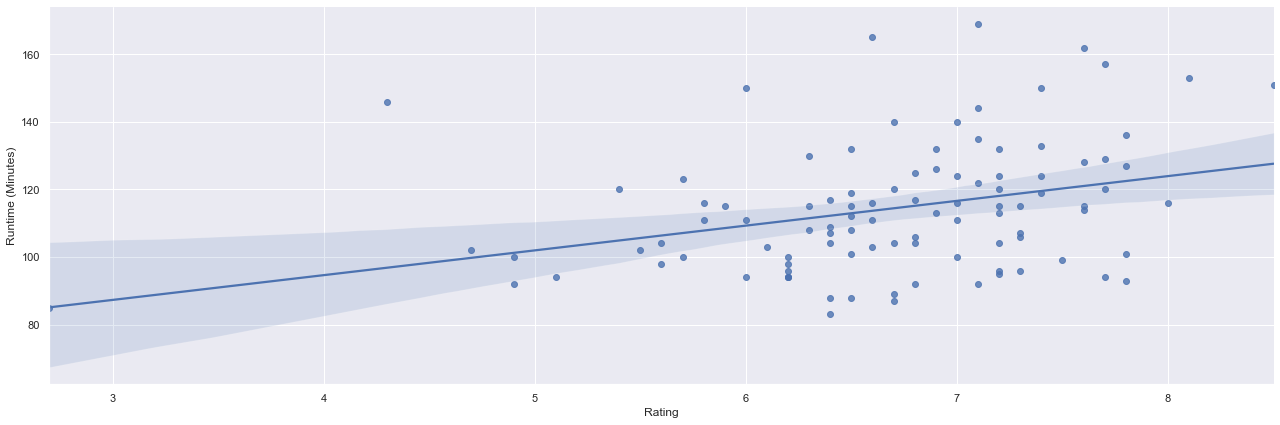

In [39]:
sns.lmplot(data=data_sample, x="Rating", y="Runtime (Minutes)").fig.set_size_inches(20,6)

Le clasement d'un film ne va pas avec sa durée

## Conclusion

Ont ne peux pas déterminer un bon film avec ces données. Le classement d'un film se fait avec les avis du public